# WQD 7006 GROUP ASSIGNMENT: CREDIT CARD FRAUD DETECTION

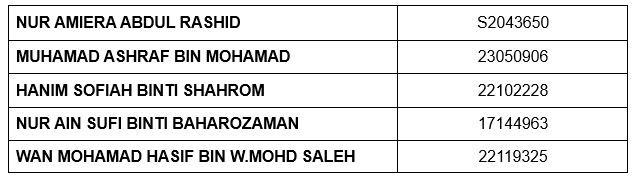

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
pip install numpy pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df = pd.read_csv('creditcard.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# 1. Data Understanding

In [8]:
df.shape

(284807, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.nunique()

Time      124592
V1        275653
V2        275655
V3        275657
V4        275654
V5        275657
V6        275652
V7        275651
V8        275643
V9        275656
V10       275646
V11       275648
V12       275654
V13       275657
V14       275653
V15       275653
V16       275645
V17       275646
V18       275655
V19       275645
V20       275632
V21       275617
V22       275644
V23       275611
V24       275645
V25       275640
V26       275647
V27       275597
V28       275558
Amount     32767
class          2
dtype: int64

In [11]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

In [12]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

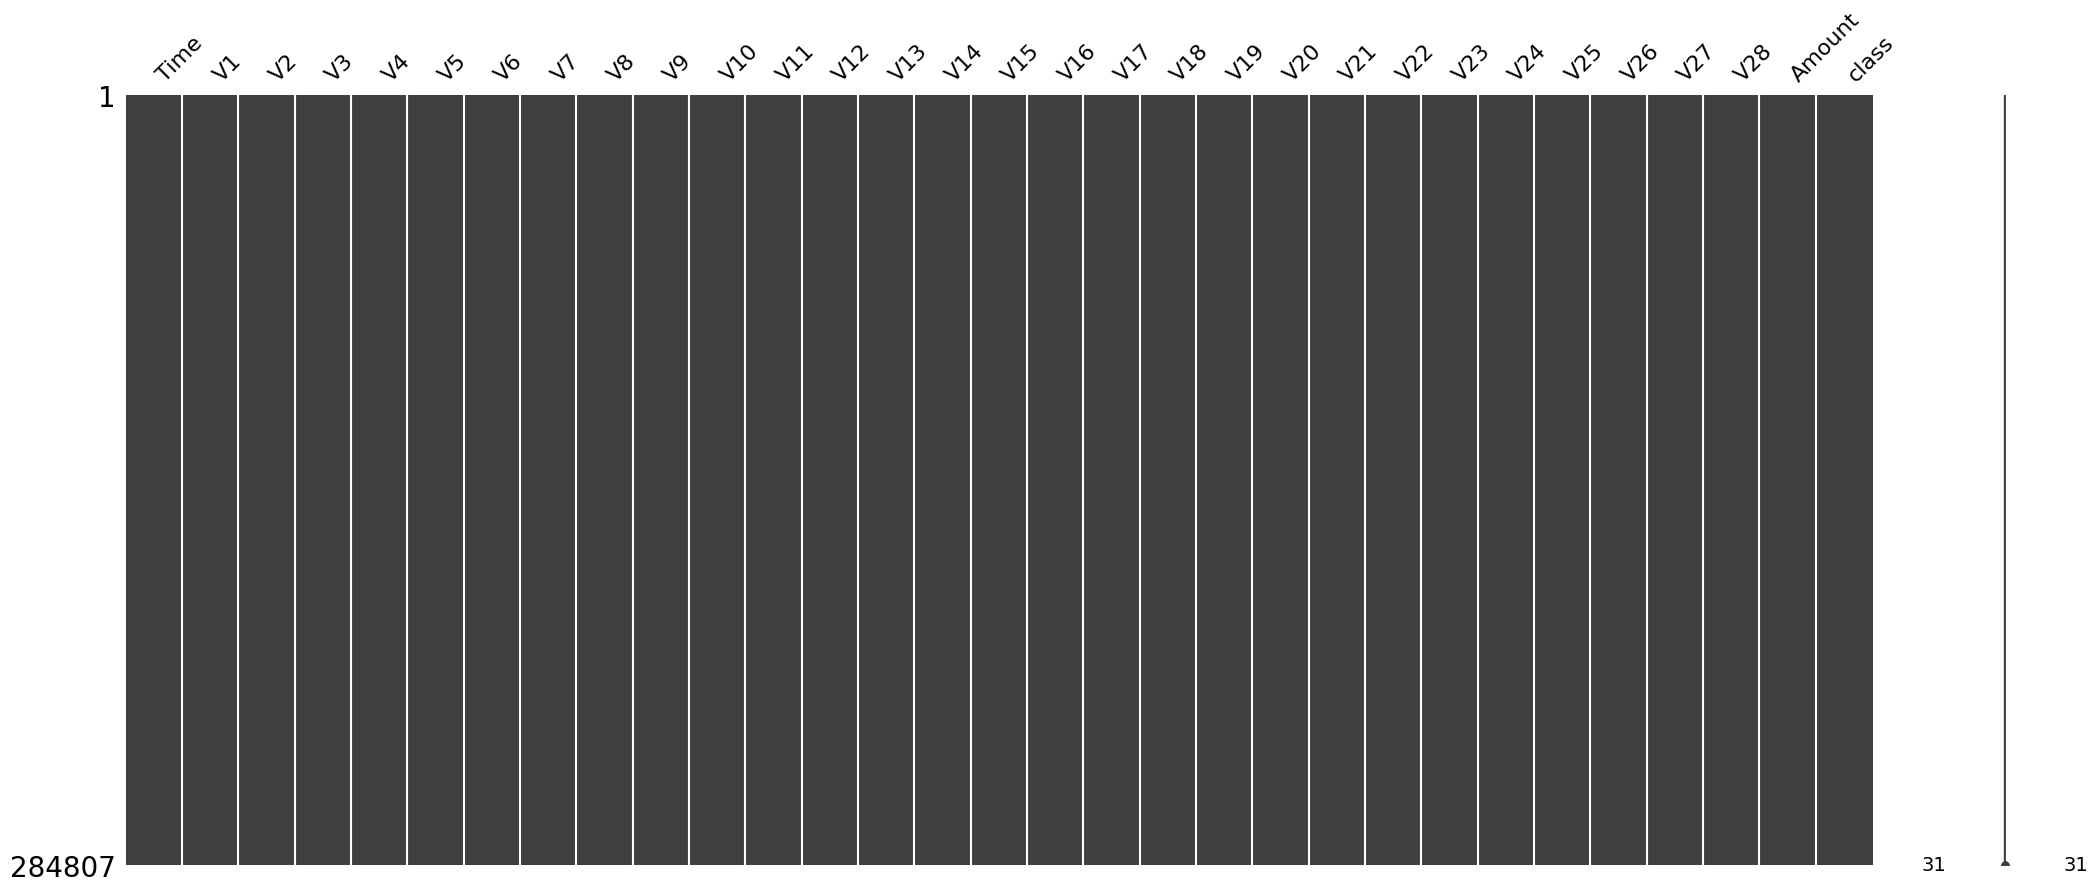

In [13]:
import missingno as mn
mn.matrix(df)

In [14]:
df.duplicated().any()

True

In [15]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Observations**
- Dataset has total of `284,807 rows` and `31 columns`.
- Dataset contains no null values.
- Dataset contains duplicated values.
- The mean of principle components `V1 - V28` are close to 0, which is expected as a result of PCA which involves centering the data by subtracting the mean.
- The average transaction amount based on the feature `Amount` is approximately 88.35.

# 2. Data Preprocessing

### 2.1 Dropping Duplicated Values

In [16]:
df.drop_duplicates(keep = 'first', inplace = True)
df.duplicated().any()

False

In [17]:
df.shape

(283726, 31)

In [18]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 2.2 Check Skewness of Features

In [19]:
df.skew().sort_values()

V8        -8.310970
V23       -5.867221
V2        -4.695162
V17       -3.690497
V1        -3.273271
V5        -2.414079
V12       -2.199008
V3        -2.151984
V20       -2.043121
V14       -1.918804
V16       -1.051161
V27       -0.753804
V24       -0.552129
V25       -0.415744
V15       -0.309659
V18       -0.248661
V22       -0.182330
Time      -0.035581
V13        0.064293
V19        0.108312
V11        0.344074
V9         0.537663
V26        0.580292
V4         0.671504
V10        1.252967
V6         1.829880
V21        2.820033
V7         2.890271
V28       11.555115
Amount    16.978803
class     24.430545
dtype: float64

- Highly `-vely` skewed features: V8, V23, V2, V17, V1, V5, V12, V3, V20, V14
- Highly `+vely` skewed features: V6, V7, V21, V28, Amount, class

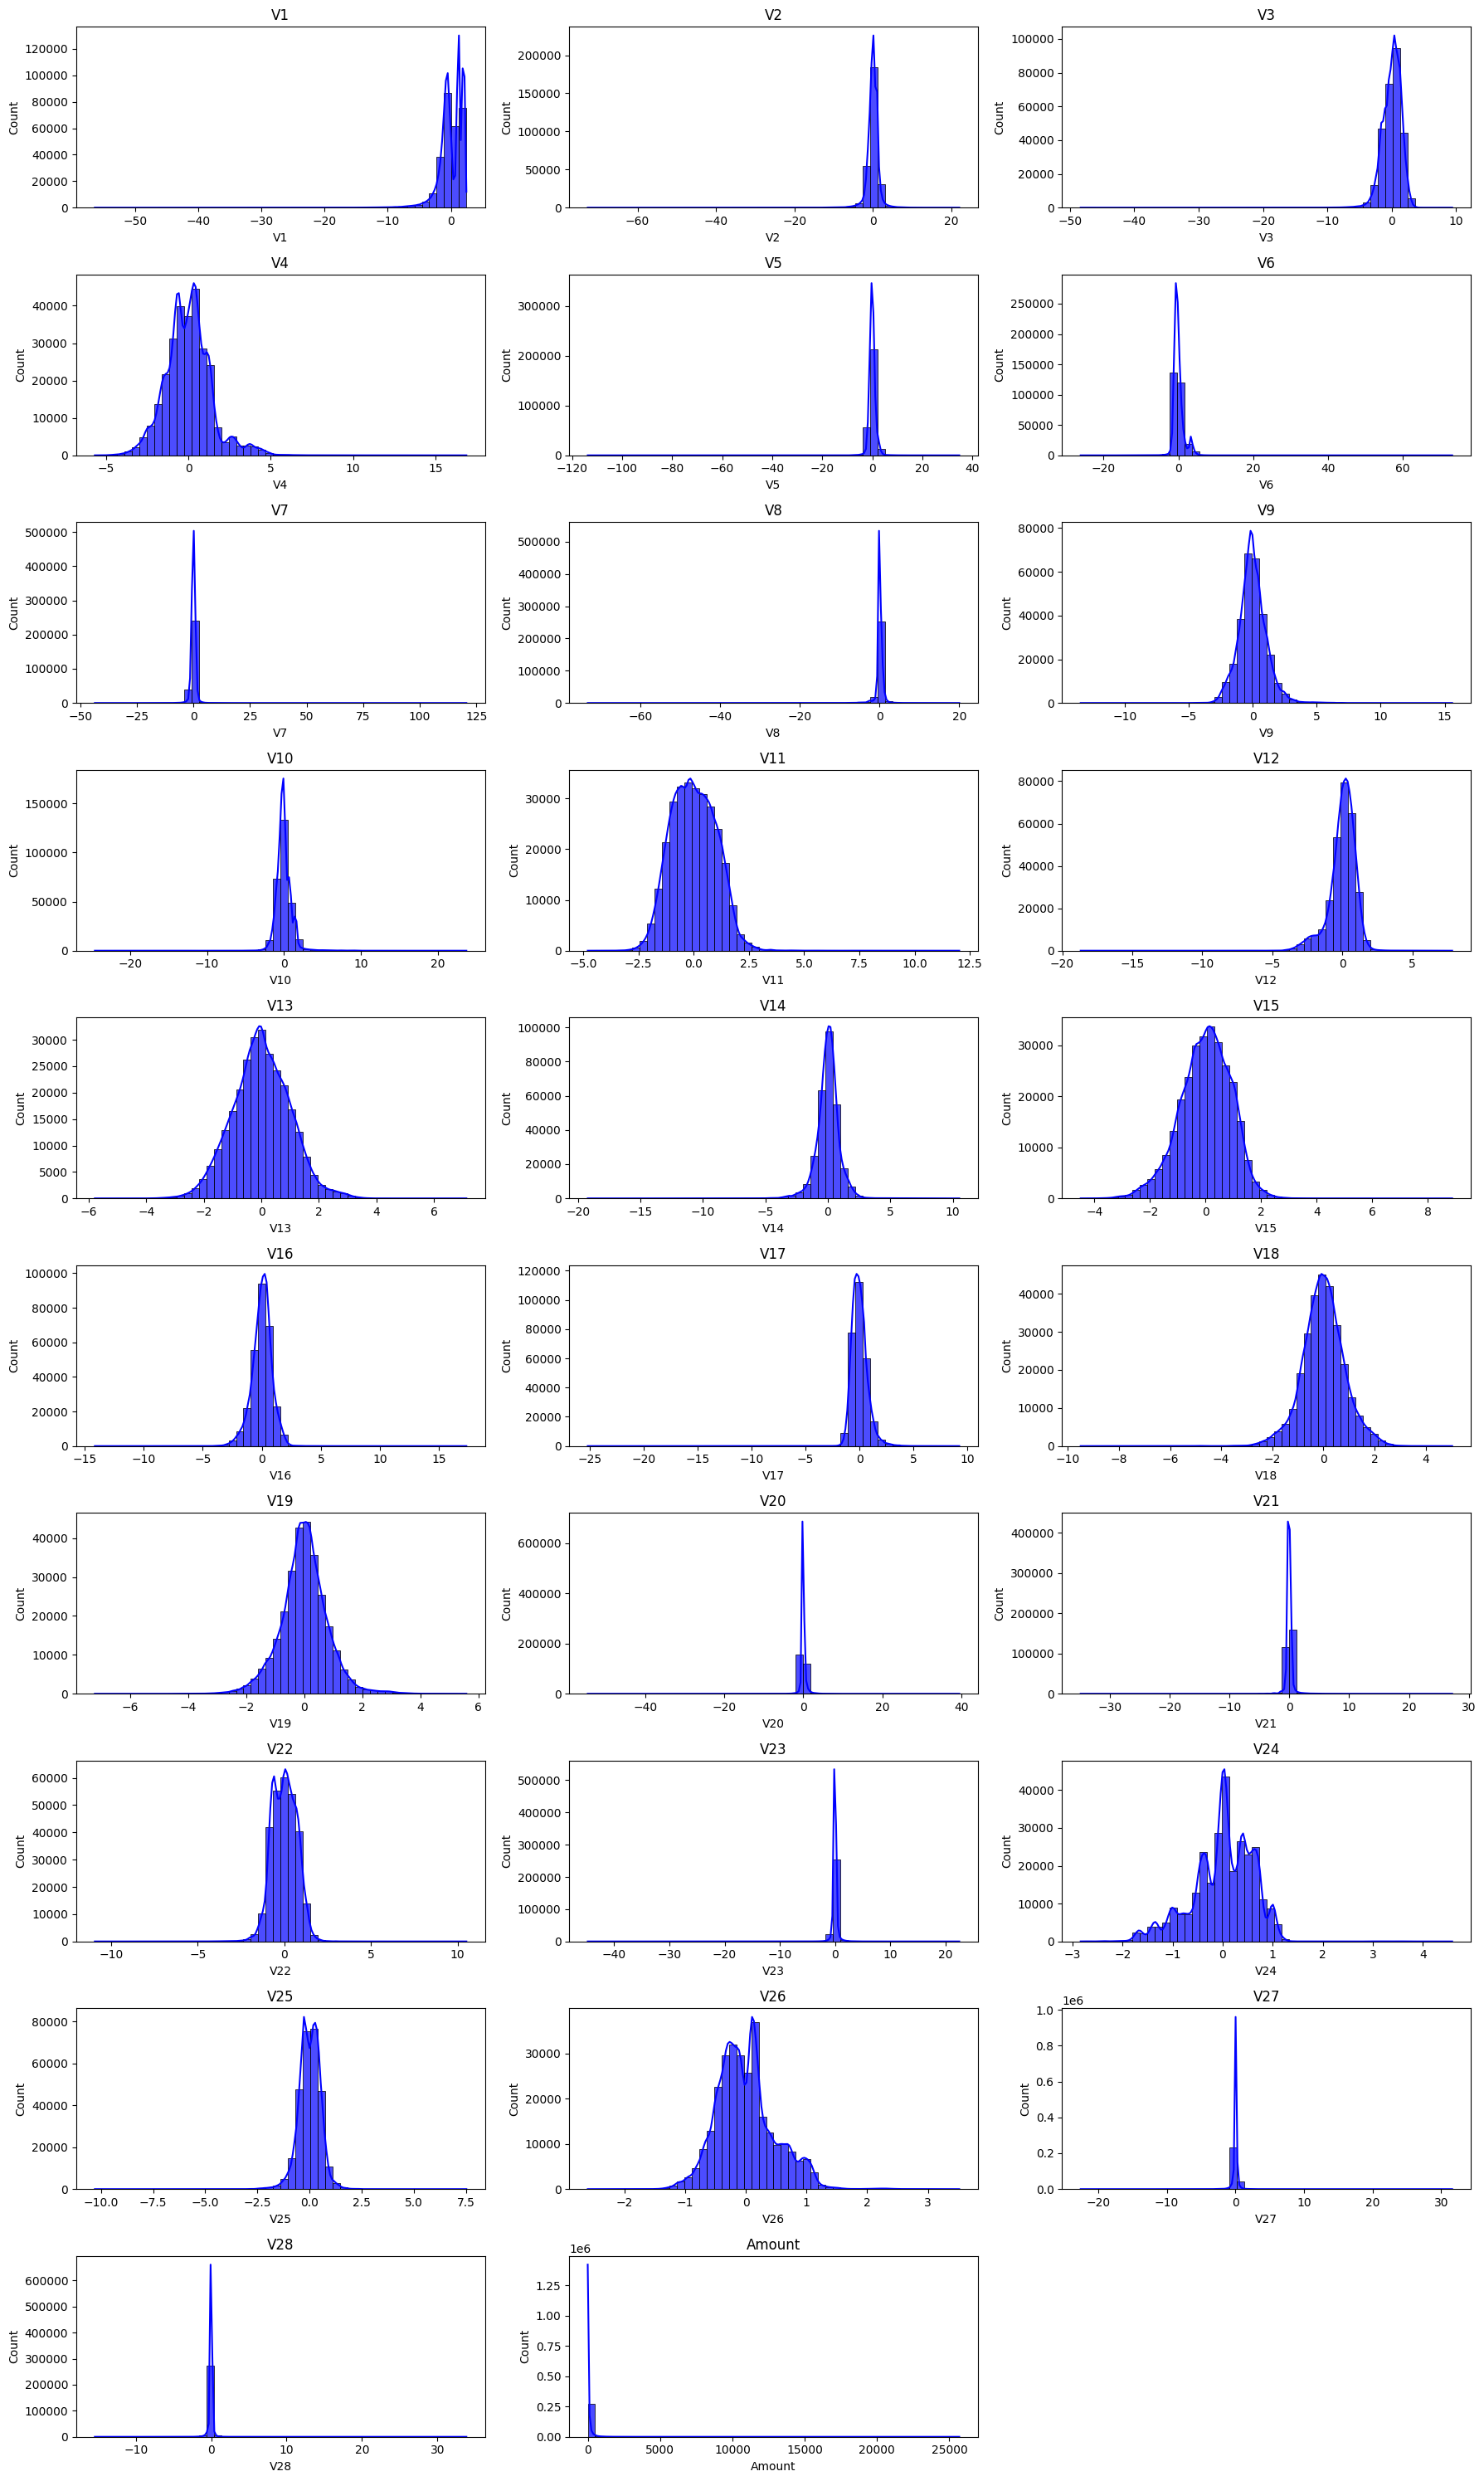

In [20]:
plt.figure(figsize=(18, 30))

# Assuming 'df' is your DataFrame and you want to exclude 'Time' and 'class' from the histograms
features = df.columns.drop(['Time', 'class'])

# Create a histogram for each feature
for i, feature in enumerate(features):
    plt.subplot(10, 3, i + 1)
    sns.histplot(df[feature], bins=50, kde=True, color='blue', alpha=0.7)
    plt.title(feature)

plt.tight_layout()
plt.show()

# 3. Data Sampling


### Handling Imbalanced Class

In [21]:
df['class'].value_counts()

class
0    283253
1       473
Name: count, dtype: int64

,count,distribution
Genuine,283253,99.83329
Fraud,473,0.16671


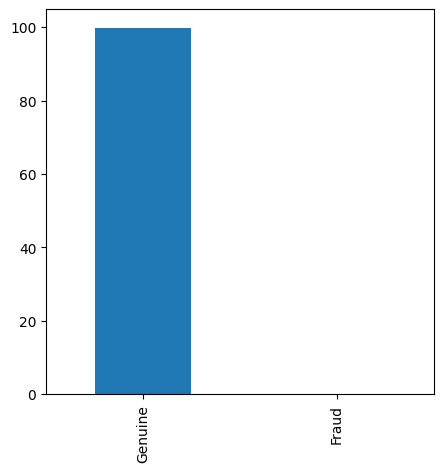

In [22]:
a = df['class'].value_counts().rename('count')
b = (df['class'].value_counts(normalize=True)*100).rename('distribution')

df_class = pd.concat([a,b], axis=1)
df_class.index = ["Genuine", "Fraud"]
df_class['distribution'].plot(kind='bar', figsize=[5,5])
df_class

- The `class` feature demonstrates `'0 - Genuine'` with a relatively higher count than `'1 - Fraud'` presenting an imbalanced distribution.

Due to the imbalanced distribution in `class`, it needs to be addressed prior to ML training and testing. In order to overcome this problem, 2 methods of sampling will be employed:


1.   Oversampling via SMOTE
2.   Undersampling



SMOTE stands for Synthetic Minority Oversampling Technique.This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases.

### 3.1 Splitting the Dataset (X = Features, y = Target)

In [23]:
X = df.drop(['Time', 'class'], axis=1)
y = df['class']
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [24]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [27]:
# Scale the data
scaler = StandardScaler()
X['scaled_amount'] = scaler.fit_transform(X[['Amount']])
X.drop('Amount', axis=1, inplace=True)

# Split the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813


### 3.2 Oversampling via SMOTE

In [29]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

C:\Users\heroa\AppData\Local\Temp\ipykernel_34556\2455504466.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette='viridis')


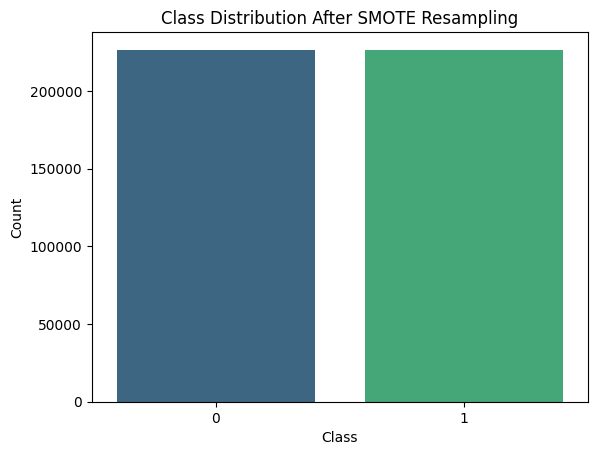

In [30]:
sns.countplot(x=y_train_smote, palette='viridis')
plt.title('Class Distribution After SMOTE Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [31]:
print(pd.Series(y_train_smote).value_counts())

class
0    226597
1    226597
Name: count, dtype: int64


### 3.3 Undersampling Majority Class



In [32]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

C:\Users\heroa\AppData\Local\Temp\ipykernel_34556\325381223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_rus, palette='viridis')


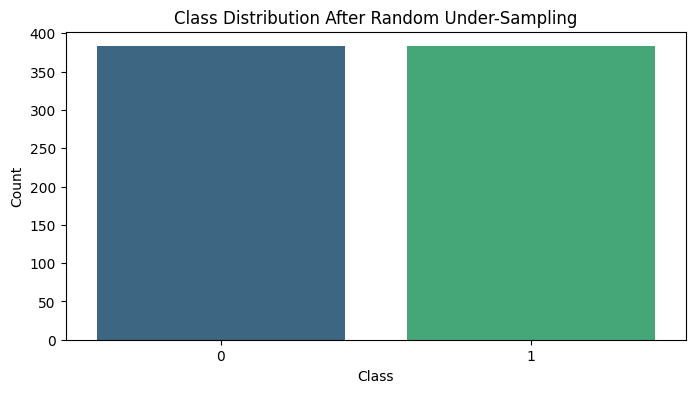

In [33]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_rus, palette='viridis')
plt.title('Class Distribution After Random Under-Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [34]:
print(pd.Series(y_train_rus).value_counts())

class
0    383
1    383
Name: count, dtype: int64


4.0 MACHINE LEARNING - XGBOOST

4.1 USING ORIGINAL DATASET

In [35]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [36]:
# Importing necessary libraries
import xgboost as xgb
from sklearn.metrics import classification_report

# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',         # Evaluation metric: log loss
    'eta': 0.1,                       # Learning rate
    'max_depth': 6,                   # Maximum tree depth
    'min_child_weight': 1,            # Minimum sum of instance weight needed in a child
    'subsample': 0.8,                 # Subsample ratio of the training instances
    'colsample_bytree': 0.8,          # Subsample ratio of columns when constructing each tree
    'gamma': 0,                       # Minimum loss reduction required to make a further partition on a leaf node
    'seed': 42                        # Random seed
}

# Convert data into DMatrix format for XGBoost for original data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Train the model with original data
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Predictions for original data
y_pred = model.predict(dtest)

# Convert predicted probabilities to binary predictions
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Evaluate the model for original data
print("Evaluation for original data:")
print(classification_report(y_test, y_pred_binary))



Evaluation for original data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.98      0.69      0.81        90

    accuracy                           1.00     56746
   macro avg       0.99      0.84      0.91     56746
weighted avg       1.00      1.00      1.00     56746



- Precision measures the accuracy of positive predictions. For class 0 (genuine transactions), the precision is 1.00, indicating that all transactions predicted as genuine are indeed genuine. For class 1 (fraudulent transactions), the precision is 0.94, suggesting that 94% of the transactions predicted as fraudulent are correct.
-Recall, also known as sensitivity, measures the proportion of actual positives that are correctly identified by the model. For class 0, the recall is 1.00, indicating that all genuine transactions are correctly identified as genuine. However, for class 1, the recall is 0.69, meaning that only 69% of the fraudulent transactions are correctly identified by the model.
- The F1-score is the harmonic mean of precision and recall and provides a balance between the two metrics. For class 0, the F1-score is 1.00, indicating excellent performance. For class 1, the F1-score is 0.79, which is lower due to the lower recall.
-Accuracy measures the overall correctness of the model's predictions. In this case, the accuracy is high at 1.00, but it may not be the most informative metric due to the class imbalance (vast majority of transactions are genuine).

Overall, the model performs very well in identifying genuine transactions (class 0) with high precision and recall. However, it struggles to correctly identify fraudulent transactions (class 1) with lower recall, indicating room for improvement, particularly in detecting fraud.

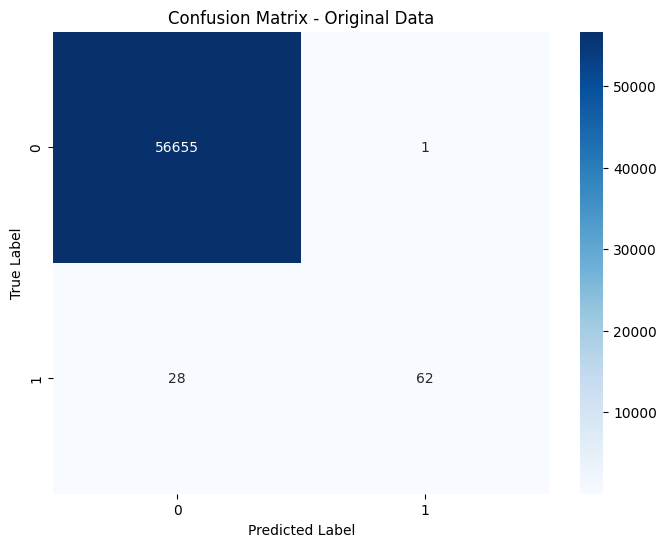

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Original Data
cm_original = confusion_matrix(y_test, y_pred_binary)
plot_confusion_matrix(cm_original, title='Confusion Matrix - Original Data')

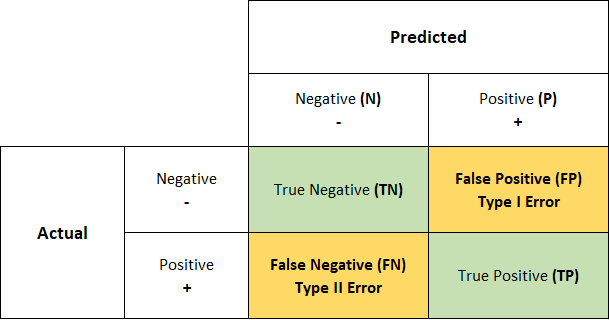

4.2 USING SMOTE DATASET

In [38]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Convert data into DMatrix format for XGBoost for SMOTE data
dtrain_smote = xgb.DMatrix(X_train_smote, label=y_train_smote)
dtest_smote = xgb.DMatrix(X_test)  # Note: Using the scaled test data

# Train the model with SMOTE data
num_rounds = 100
model_smote = xgb.train(params, dtrain_smote, num_rounds)

# Predictions for SMOTE data
y_pred_smote = model_smote.predict(dtest_smote)

# Convert predicted probabilities to binary predictions
y_pred_smote_binary = [1 if p >= 0.5 else 0 for p in y_pred_smote]

# Evaluate the model for SMOTE data
print("Evaluation for SMOTE data:")
print(classification_report(y_test, y_pred_smote_binary))


Evaluation for SMOTE data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.36      0.80      0.49        90

    accuracy                           1.00     56746
   macro avg       0.68      0.90      0.75     56746
weighted avg       1.00      1.00      1.00     56746



- The precision for class 0 (genuine transactions) is 1.00, indicating that all transactions predicted as genuine are indeed genuine. For class 1 (fraudulent transactions), the precision is 0.38, suggesting that only 38% of the transactions predicted as fraudulent are correct.
- The recall for class 0 is 1.00, indicating that all genuine transactions are correctly identified as genuine. However, for class 1, the recall is 0.80, meaning that 80% of the fraudulent transactions are correctly identified by the model.
- The F1-score for class 0 is 1.00, indicating excellent performance. For class 1, the F1-score is 0.51, which is lower due to the lower precision.
- The overall accuracy is high at 1.00, but, similar to the original dataset, it may not provide a complete picture due to the class imbalance.

Overall, the model trained on the SMOTE-resampled dataset performs well in identifying both genuine and fraudulent transactions. However, there is a trade-off between precision and recall, with lower precision for fraudulent transactions but higher recall compared to the original dataset. This indicates that while more fraudulent transactions are correctly identified, there is a higher rate of false positives.

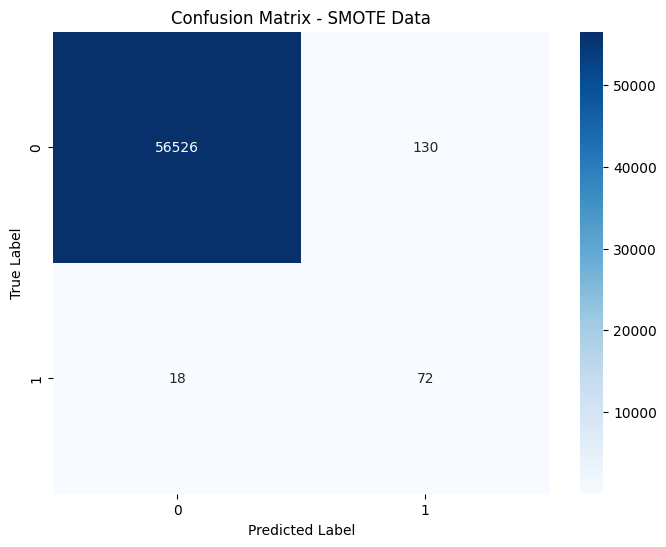

In [39]:
# SMOTE Data
cm_smote = confusion_matrix(y_test, y_pred_smote_binary)
plot_confusion_matrix(cm_smote, title='Confusion Matrix - SMOTE Data')

4.3 USING RUS DATASET

In [40]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Convert data into DMatrix format for XGBoost for RUS data
dtrain_rus = xgb.DMatrix(X_train_rus, label=y_train_rus)
dtest_rus = xgb.DMatrix(X_test)  # Note: Using the scaled test data

# Train the model with RUS data
num_rounds = 100
model_rus = xgb.train(params, dtrain_rus, num_rounds)

# Predictions for RUS data
y_pred_rus = model_rus.predict(dtest_rus)

# Convert predicted probabilities to binary predictions
y_pred_rus_binary = [1 if p >= 0.5 else 0 for p in y_pred_rus]

# Evaluate the model for RUS data
print("Evaluation for RUS data:")
print(classification_report(y_test, y_pred_rus_binary))


Evaluation for RUS data:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56656
           1       0.05      0.89      0.09        90

    accuracy                           0.97     56746
   macro avg       0.52      0.93      0.54     56746
weighted avg       1.00      0.97      0.98     56746



- The precision for class 0 (genuine transactions) is 1.00, indicating that all transactions predicted as genuine are indeed genuine. For class 1 (fraudulent transactions), the precision is 0.05, suggesting that only 5% of the transactions predicted as fraudulent are correct.
- The recall for class 0 is 0.97, indicating that 97% of the genuine transactions are correctly identified as genuine. For class 1, the recall is 0.89, meaning that 89% of the fraudulent transactions are correctly identified by the model.
- The F1-score for class 0 is 0.99, indicating high performance in identifying genuine transactions. However, for class 1, the F1-score is only 0.10, which is significantly lower due to the low precision.
- The overall accuracy is 0.97, indicating that 97% of the predictions are correct. However, similar to the other datasets, accuracy may not be the most informative metric due to the class imbalance.

Overall, the model trained on the RUS dataset performs well in identifying genuine transactions but struggles with identifying fraudulent transactions, as indicated by the low precision and F1-score for class 1. While the recall for class 1 is relatively high, it comes at the expense of a high rate of false positives, resulting in lower precision.

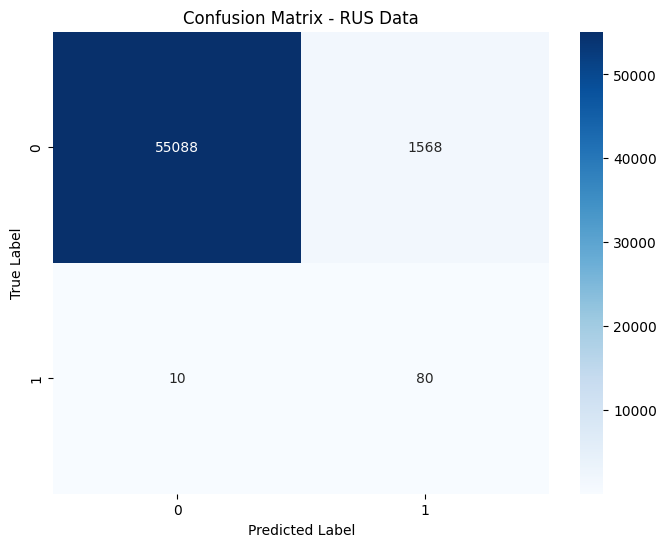

In [41]:
# RUS Data
cm_rus = confusion_matrix(y_test, y_pred_rus_binary)
plot_confusion_matrix(cm_rus, title='Confusion Matrix - RUS Data')

In [42]:
!pip install shap


4.4 SHAP USING ORIGINAL DATASET

In [1]:
import shap
# Initialize the SHAP explainer with the XGBoost model and the training data for the original dataset
explainer_original = shap.Explainer(model, X_train)

# Calculate SHAP values for the test data for the original dataset
shap_values_original = explainer_original.shap_values(X_test)

# Visualize the SHAP values for the original dataset
shap.summary_plot(shap_values_original, X_test)


C:\Users\heroa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'model' is not defined

 99%|===================| 56165/56746 [01:11<00:00]        

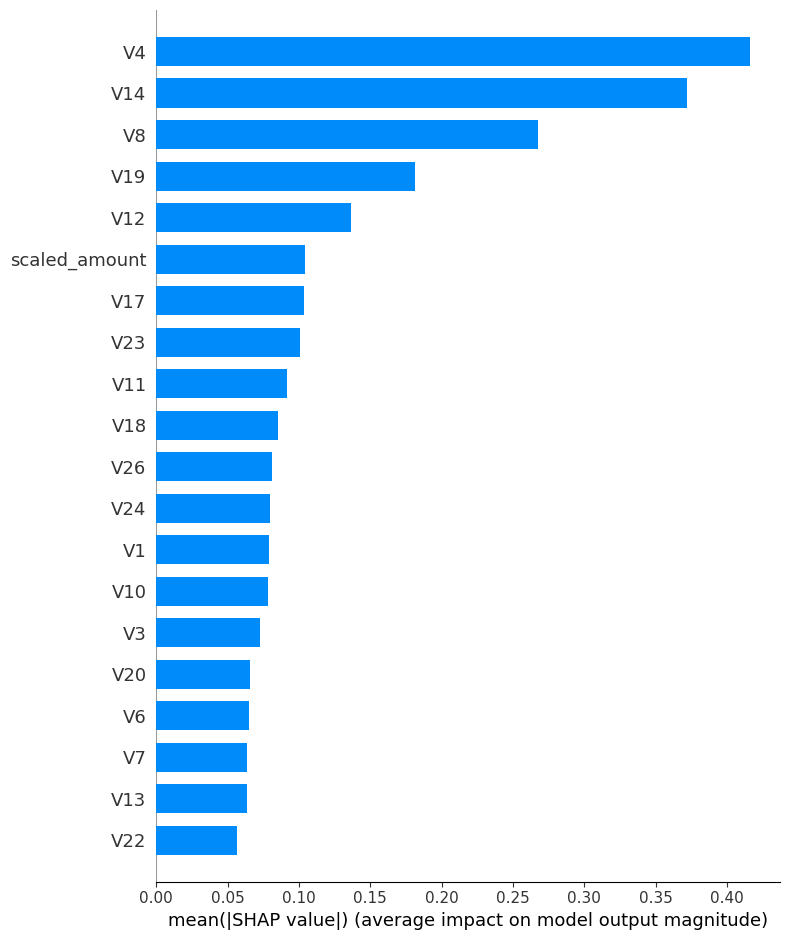

In [44]:
import shap
import matplotlib.pyplot as plt

# Calculate SHAP values for the test data for the original dataset
shap_values_original = explainer_original.shap_values(X_test)

# Plot the bar plot of SHAP values for each feature for the original dataset
shap.summary_plot(shap_values_original, X_test, plot_type="bar")
plt.show()


- High Impact Features:

V4, V14, V8, and V19 stand out as the most influential features, exhibiting large positive and negative SHAP values.
These features likely play a significant role in driving the model's predictions, with their presence or absence having a substantial effect on the output.

- Moderate Impact Features:

Features like V18 show moderate positive and negative SHAP values, suggesting they contribute to the model's decision-making process to some extent, but not as prominently as the high impact features.

- Low Impact Features:

A large number of features, including scaled_amount, V12, V17, V26, V11, V23, V3, V10, V22, V20, V24, V13, V16, V7, and V28, have relatively small SHAP values.
These features likely have minimal influence on the model's output and may not be as valuable in predicting the target variable.

4.5 SHAP USING SMOTE DATASET

 99%|===================| 56408/56746 [02:44<00:00]        

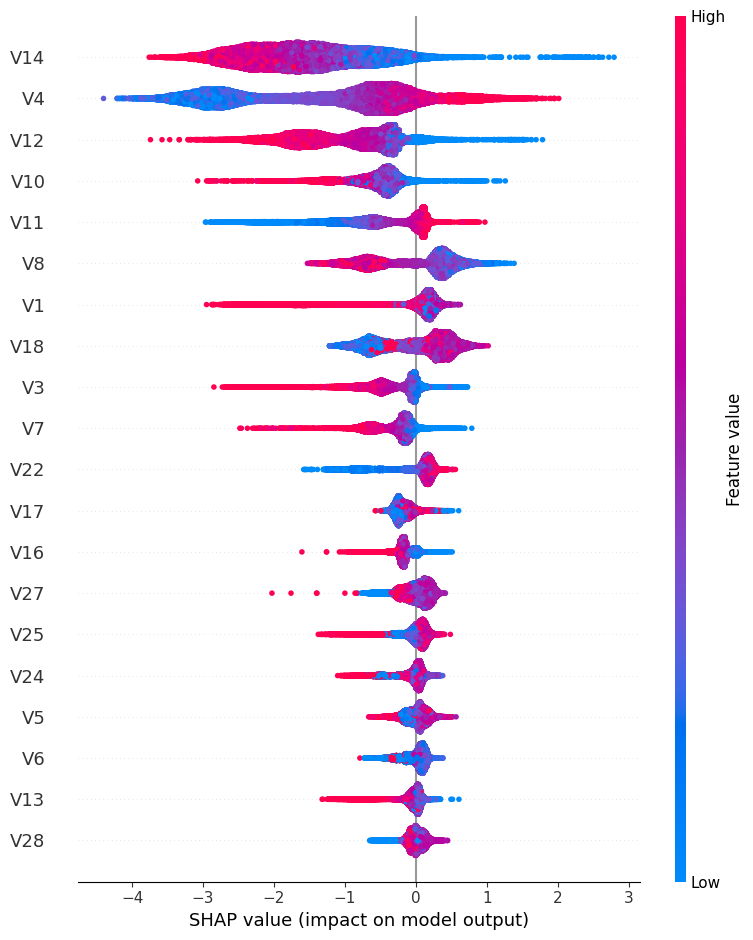

In [45]:
# Initialize the SHAP explainer with the XGBoost model and the training data for the SMOTE-resampled dataset
explainer_smote = shap.Explainer(model_smote, X_train_smote)

# Calculate SHAP values for the test data for the SMOTE-resampled dataset
shap_values_smote = explainer_smote.shap_values(X_test)

# Visualize the SHAP values for the SMOTE-resampled dataset
shap.summary_plot(shap_values_smote, X_test)


100%|===================| 56619/56746 [02:42<00:00]        

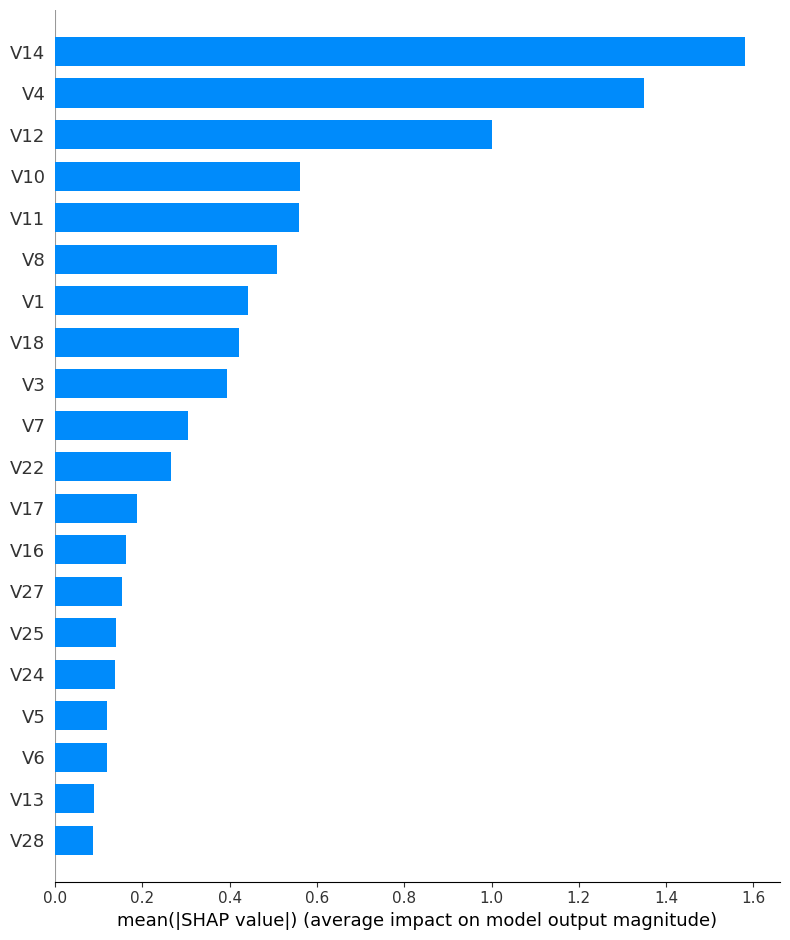

In [46]:
# Calculate SHAP values for the test data for the SMOTE-resampled dataset
shap_values_smote = explainer_smote.shap_values(X_test)

# Plot the bar plot of SHAP values for each feature for the SMOTE-resampled dataset
shap.summary_plot(shap_values_smote, X_test, plot_type="bar")
plt.show()


- High Impact Features:

V14 stands out as the most influential feature, exhibiting the largest positive and negative SHAP values as well as the longest bar.
Other features like V4, V12, V10, V11, and V8 also show relatively high positive and negative SHAP values and longer bars.
These features likely play a significant role in driving the model's predictions and have a substantial impact on the output.

- Moderate Impact Features:

Features such as V18, V1, V7, and V3 display moderate positive and negative SHAP values and bar lengths.
These features contribute to the model's decision-making process to some extent but not as prominently as the high impact features.

- Low Impact Features:

A number of features, including V28, V27, V16, V24, V25, V19, and V2, exhibit relatively small SHAP values and shorter bars.
These features likely have minimal influence on the model's output and may not be as valuable in predicting the target variable for the SMOTE-resampled dataset.

4.6 SHAP USING RUS DATASET

 99%|===================| 56313/56746 [01:25<00:00]        

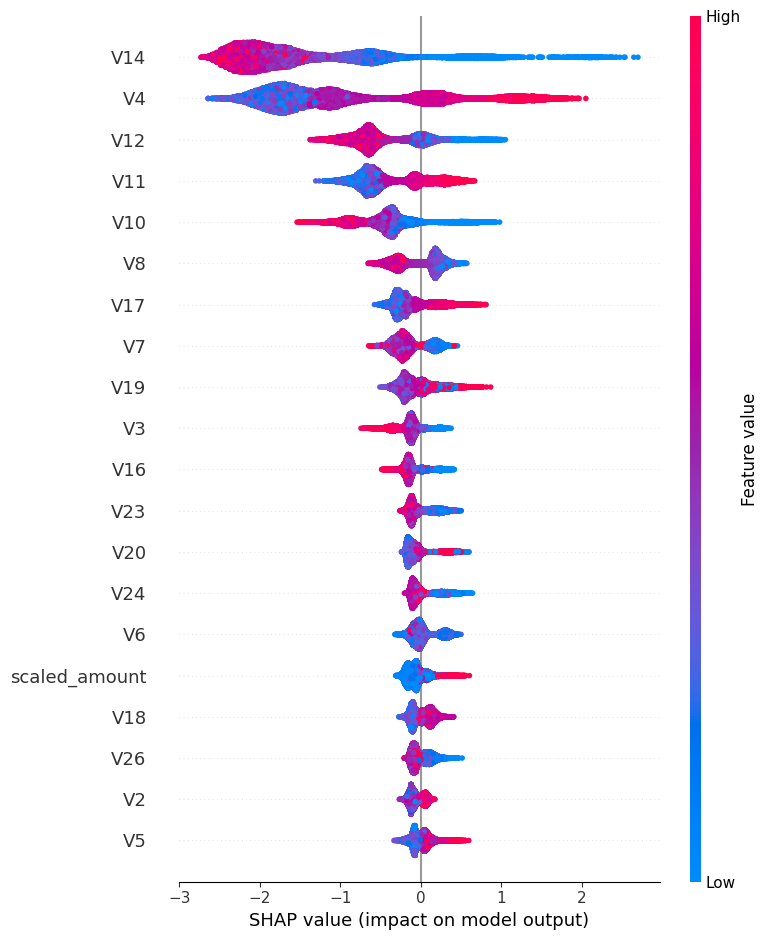

In [47]:
# Initialize the SHAP explainer with the XGBoost model and the training data for the RUS-resampled dataset
explainer_rus = shap.Explainer(model_rus, X_train_rus)

# Calculate SHAP values for the test data for the RUS-resampled dataset
shap_values_rus = explainer_rus.shap_values(X_test)

# Visualize the SHAP values for the RUS-resampled dataset
shap.summary_plot(shap_values_rus, X_test)


 99%|===================| 56444/56746 [01:26<00:00]        

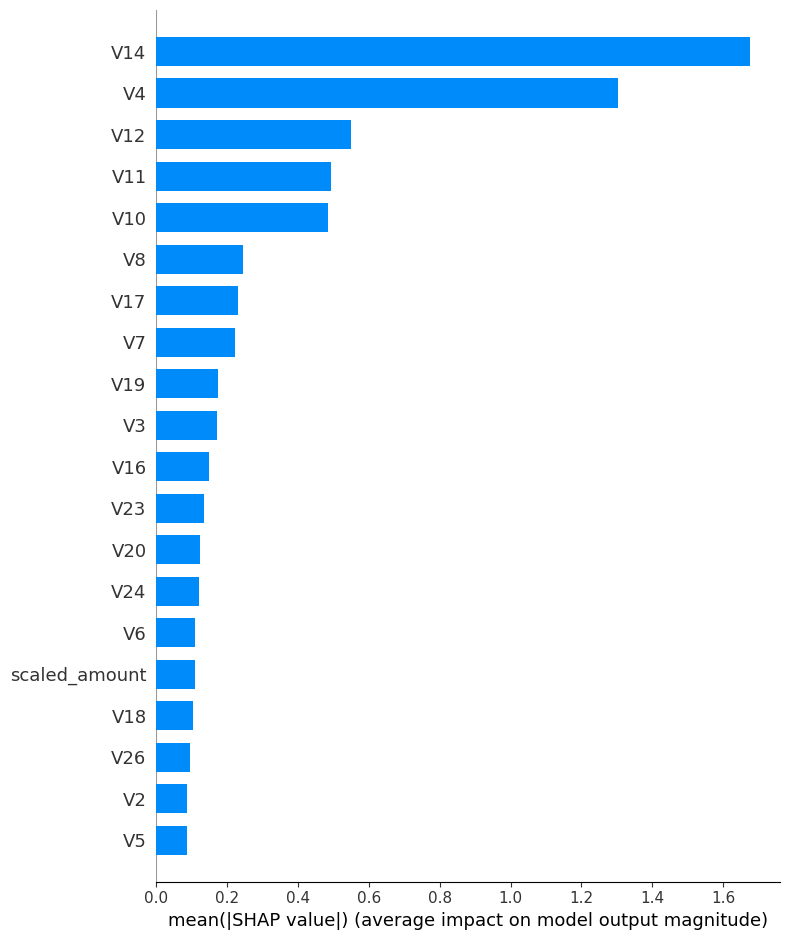

In [48]:
# Calculate SHAP values for the test data for the RUS-resampled dataset
shap_values_rus = explainer_rus.shap_values(X_test)

# Plot the bar plot of SHAP values for each feature for the RUS-resampled dataset
shap.summary_plot(shap_values_rus, X_test, plot_type="bar")
plt.show()


- High Impact Features:

V14 stands out as the most influential feature, exhibiting the largest positive and negative SHAP values as well as the longest bar.
Other features like V4, V12, V10, V11, and V19 also show relatively high positive and negative SHAP values and longer bars.
These features likely play a significant role in driving the model's predictions and have a substantial impact on the output.

- Moderate Impact Features:

Features such as V8, V7, V17, and V16 display moderate positive and negative SHAP values and bar lengths.
These features contribute to the model's decision-making process to some extent but not as prominently as the high impact features.

- Low Impact Features:

A number of features, including V23, V15, V24, V21, V9, V18, and V6, exhibit relatively small SHAP values and shorter bars.
These features likely have minimal influence on the model's output and may not be as valuable in predicting the target variable for the RUS dataset.

4.7 AUPRC USING ORIGINAL DATASET

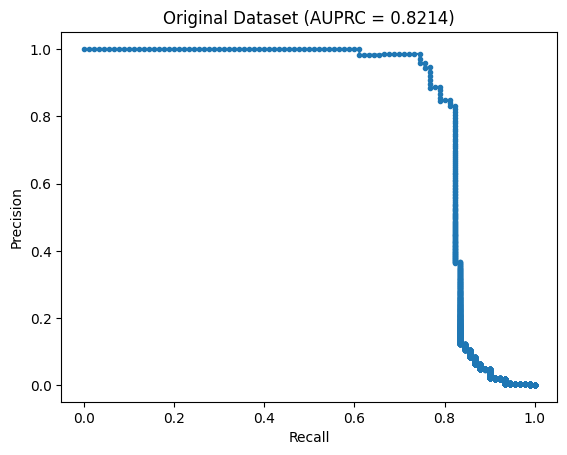

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Function to plot the Precision-Recall Curve and calculate AUPRC
def plot_auprc(y_test, y_pred_proba, title):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    auprc = auc(recall, precision)
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{title} (AUPRC = {auprc:.4f})')
    plt.show()

# For the original dataset
y_pred_proba_original = model.predict(dtest)
plot_auprc(y_test, y_pred_proba_original, "Original Dataset")

- High Precision: The curve starts at a high precision of 1.0, indicating that the model has a high accuracy in identifying fraud cases with minimal false positives at the beginning.
- Recall Decrease: As recall increases, precision starts to drop, indicating that as the model tries to identify more fraud cases (increasing recall), it also starts to make more mistakes, reducing precision.
- AUPRC of 0.8214: This value indicates a good balance between precision and recall, showing that the model performs well in distinguishing between fraud and genuine transactions.

4.8 AUPRC USING SMOTE DATASET

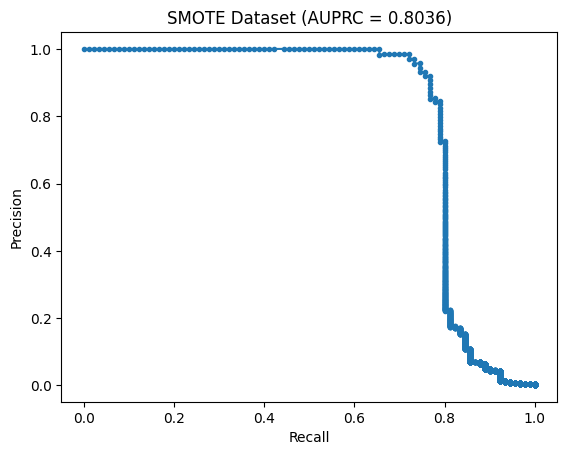

In [50]:
# For the SMOTE dataset
y_pred_proba_smote = model_smote.predict(dtest_smote)
plot_auprc(y_test, y_pred_proba_smote, "SMOTE Dataset")

- The curve shows a similar pattern to the original dataset, but with slightly lower overall performance.
- SMOTE helps to address the class imbalance, which is crucial in datasets with few positive samples (fraud cases). However, the introduction of synthetic data might lead to a few more false positives, impacting precision slightly.

4.9 AUPRC USING RUS DATASET

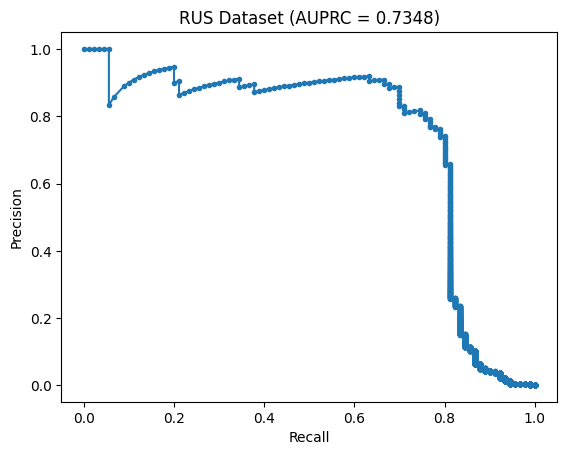

In [51]:
# For the RUS dataset
y_pred_proba_rus = model_rus.predict(dtest_rus)
plot_auprc(y_test, y_pred_proba_rus, "RUS Dataset")

- The precision-recall curve for the RUS dataset shows more fluctuation, indicating less stability in performance.
- RUS can be effective in situations where you want to reduce the number of majority class examples to balance the dataset. However, this can lead to a loss of information and a decrease in the model's ability to correctly identify fraud cases, as reflected by the lower AUPRC.

Summary:
- Original Dataset: Shows the best balance with an AUPRC of 0.8214, indicating good model performance without any resampling techniques.
- SMOTE Dataset: Slightly lower performance (AUPRC of 0.8036) but helps in addressing class imbalance, improving recall at the cost of some precision.
- RUS Dataset: The lowest performance (AUPRC of 0.7348) with more fluctuation, suggesting a loss of valuable information due to undersampling of the majority class.